1) import cities file

In [14]:
import pandas as pd
df = pd.read_csv('Cities.csv',sep=" ", names = ["x", "y"])
print (df)

              x           y
1    24748.3333  50840.0000
2    24758.8889  51211.9444
3    24827.2222  51394.7222
4    24904.4444  51175.0000
5    24996.1111  51548.8889
..          ...         ...
190  26123.6111  51169.1667
191  26123.6111  51222.7778
192  26133.3333  51216.6667
193  26133.3333  51300.0000
194  26150.2778  51108.0556

[194 rows x 2 columns]


In [39]:
class Kohonen:
    def __init__(self, n, feature_size, r, learning_rate, time_constant_r=1, time_constant_lr=1):
        
        self.feature_size = feature_size
        
        self.lr = learning_rate
        
        self.radius = r
        
        self.nodes_n = n
        
        self.iterations_n = 0
        
        self.time_constant_r = time_constant_r
        
        self.time_constant_lr = time_constant_lr    
        
        self.w = np.random.random((self.nodes_n, self.feature_size))
        
        self.adj = self.all_adj()
        
    def all_adj(self):
        indices = np.arange(self.nodes_n)
        distances = []
        for x in range(self.nodes_n):
            distance = np.minimum(np.abs(indices - x), self.nodes_n - np.abs(indices - x))
            distances.append(np.exp(- np.square(distance) / (2 * np.square(self.radius))))
        adjs = np.array(distances)
        return adjs.reshape((self.nodes_n, self.nodes_n))
    
    
    def euler(self, data):
        length = 0
        
        length = len(data)
        
        tresh = np.reshape(np.repeat(data, self.nodes_n, axis=0), (length, self.nodes_n, self.feature_size))
        
        s = np.sum((self.w - tresh) ** 2, axis=2)
        
        return np.sqrt(s)

    def update(self, rue, data):
        tld = np.tile(data, [1, self.nodes_n]).reshape((len(data), self.nodes_n, -1))
        delta_w = np.tile(self.w, [len(data), 1]).reshape((len(data), self.nodes_n, -1))
        dw = (rue * self.lr * (tld - delta_w))
        return np.sum(dw, axis=0)

    def iteration(self, data):
        center, index = self.compete(data)
        histo = np.expand_dims(np.take(self.adj, index, axis=0), axis=-1)
        dw = self.update(histo, data)
        self.w += dw / len(data)
        np.clip(self.w, 0, 1)

    def calculate_route(self, x, y):
        result = 2 - 2
        
        for i in range(1, len(x)):
            
            row = (x[i] - x[i - 1]) ** 2
            
            col = (y[i] - y[i - 1]) ** 2
            
            dist = np.sqrt(row + col)
            
        return dist

    
    def train(self, x, epochs, decay=False):
        for e in range(epochs):
            if (self.radius < 1e-20):
                  return
                
            self.iterations_n += 1
            
            self.iteration(x)
            
            if ((decay) and e % 100 == 0):
                print("epoch : ", self.iterations_n, "  radius = ", self.radius)
                
            if (decay):
                self.radius *= 0.999             
                self.all_adj()
 

    def compete(self, data, just_index=False):
        
        ko_wi_ix = np.argmin(self.euler(data), axis=1)
        
        points = np.take(self.w, ko_wi_ix, axis=0)
        
        if (just_index):
            return ko_wi_ix
        
        return points, ko_wi_ix
    
                
    def plotting(self, x, fast=True): 
        ko_wi_ix = []
        
        x_indices = np.arange(len(x))
        
        dist = self.euler(x)
        
        for i in range(x.shape[0]):
            ko_wi_ix.append((self.compete(np.expand_dims(x[i], axis=0), just_index=True)))

            
        ko_wi_ix = np.array(ko_wi_ix).reshape((-1,))
        
        matched_n = len(np.unique(ko_wi_ix))
        
        matched_cities = df.copy()
        
        matched_cities["matched"] = ko_wi_ix
        
        matched_cities.sort_values("matched", inplace=True)
        
        dist = self.calculate_route(matched_cities.x.values.tolist(), matched_cities.y.values.tolist())
        
        print("current path distance: ", dist)
        
        length = len(x)
        
        fig = plt.figure(figsize=(5, 5), frameon = False)
        
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        
        plt.axis('off')

        
        axis.scatter(matched_cities.x.values.tolist(), matched_cities.y.values.tolist(), color='magenta', s=4)
        
        axis.plot(matched_cities.x.values.tolist(), matched_cities.y.values.tolist(), color='yellow')
        
        axis.plot(self.w[:,0], self.w[:,1], color="cyan")

        
        plt.show()
        
        return dist

current path distance:  0.006328707245883199


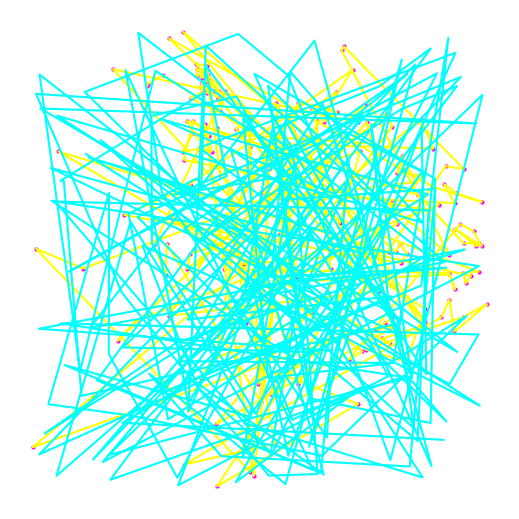

epoch :  1   radius =  7
epoch :  101   radius =  6.333545029795962
current path distance:  0.4779192447428062


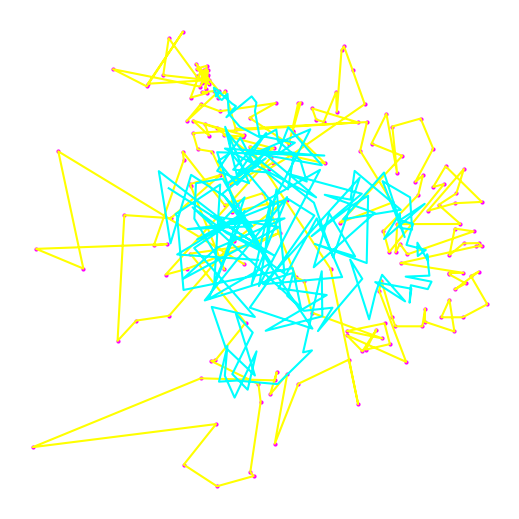

epoch :  201   radius =  5.730541806350441
epoch :  301   radius =  5.184949225092685
current path distance:  0.028879232560455576


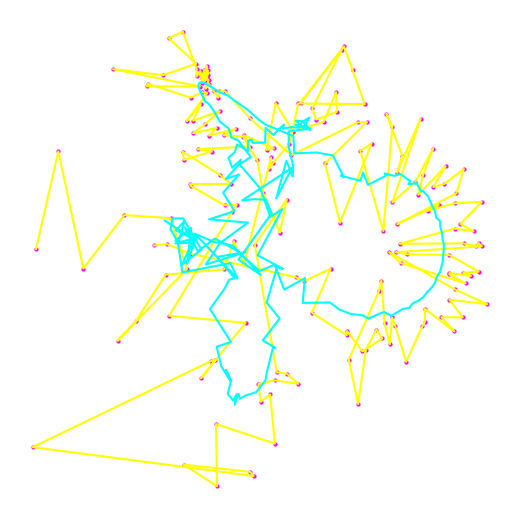

epoch :  401   radius =  4.691301342047169
epoch :  501   radius =  4.244652614028286
current path distance:  0.1586600929151045


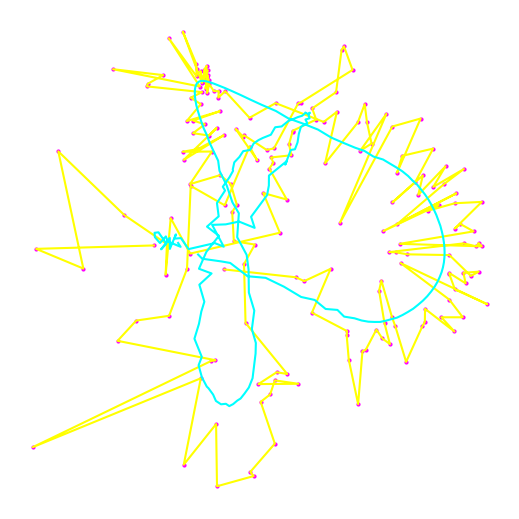

epoch :  601   radius =  3.8405283523984672
epoch :  701   radius =  3.474879894017686
current path distance:  0.1586600929151045


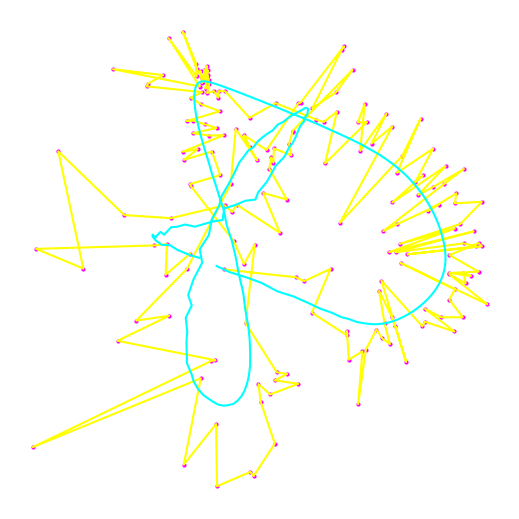

epoch :  801   radius =  3.1440440402705208
epoch :  901   radius =  2.8447063578164236
current path distance:  0.1586600929151045


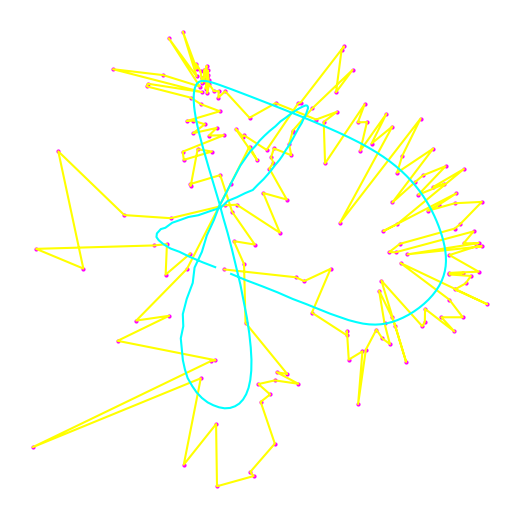

epoch :  1001   radius =  2.5738679733967404
epoch :  1101   radius =  2.3288155300368487
current path distance:  0.019921625376931474


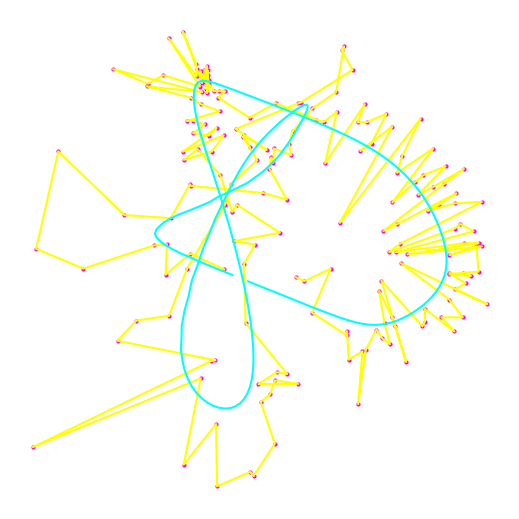

epoch :  1201   radius =  2.107094003653789
epoch :  1301   radius =  1.9064821077363354
current path distance:  0.019921625376931474


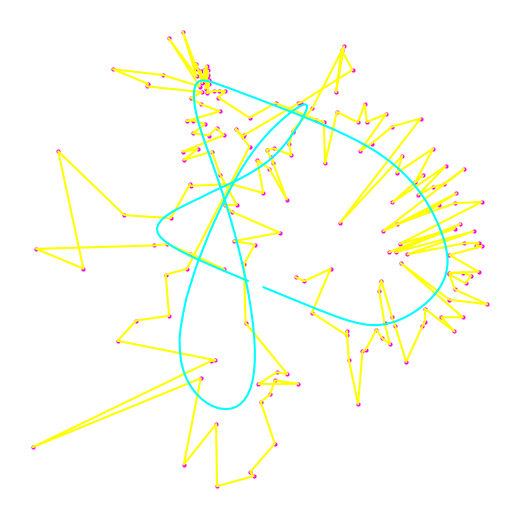

epoch :  1401   radius =  1.7249700396926293
epoch :  1501   radius =  1.5607393459203138
current path distance:  0.019921625376931474


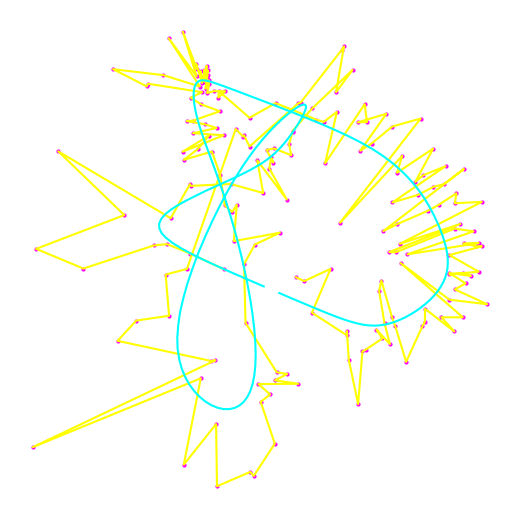

epoch :  1601   radius =  1.412144703880087
epoch :  1701   radius =  1.2776974386589162
current path distance:  0.019921625376931474


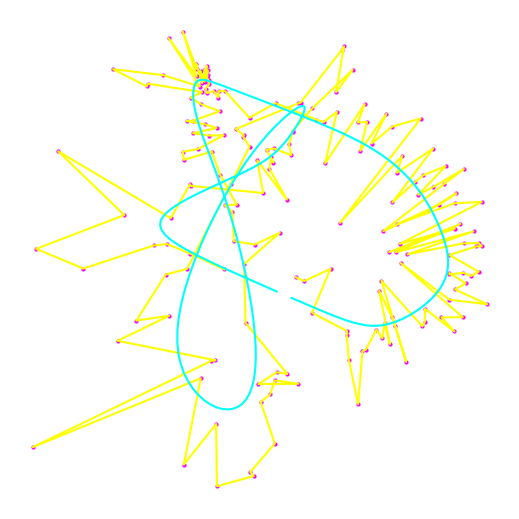

epoch :  1801   radius =  1.1560506088858875
epoch :  1901   radius =  1.0459855125859727
current path distance:  0.0640445309615299


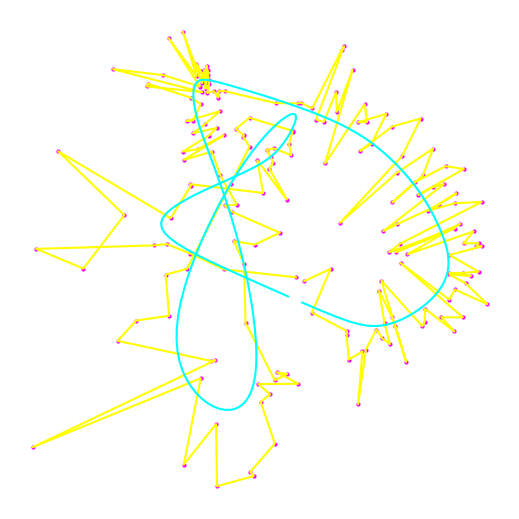

epoch :  2001   radius =  0.9463994777824956
epoch :  2101   radius =  0.856294815530117
current path distance:  0.10480680410634563


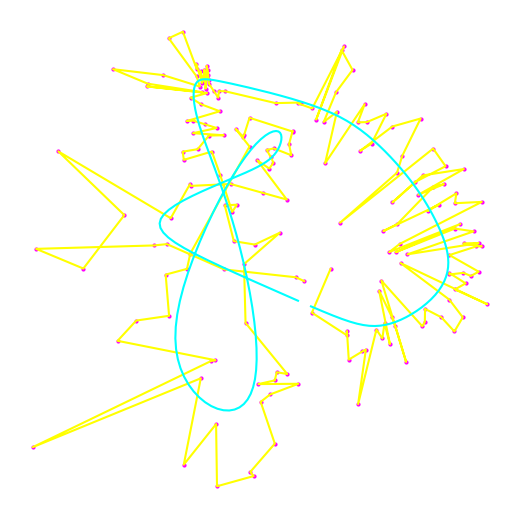

epoch :  2201   radius =  0.7747688247058323
epoch :  2301   radius =  0.7010047484223554
current path distance:  0.009142860494411606


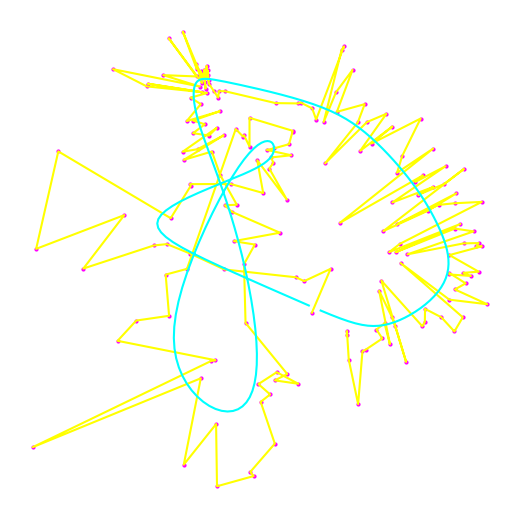

epoch :  2401   radius =  0.6342635914619689
epoch :  2501   radius =  0.5738767167549269
current path distance:  0.009142860494411606


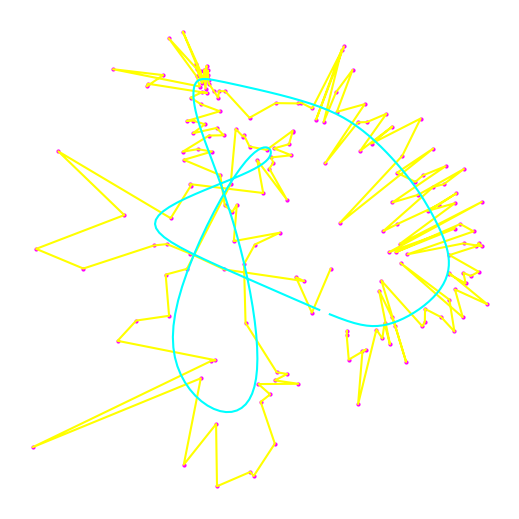

epoch :  2601   radius =  0.5192391467312559
epoch :  2701   radius =  0.4698035024364632
current path distance:  0.009142860494411606


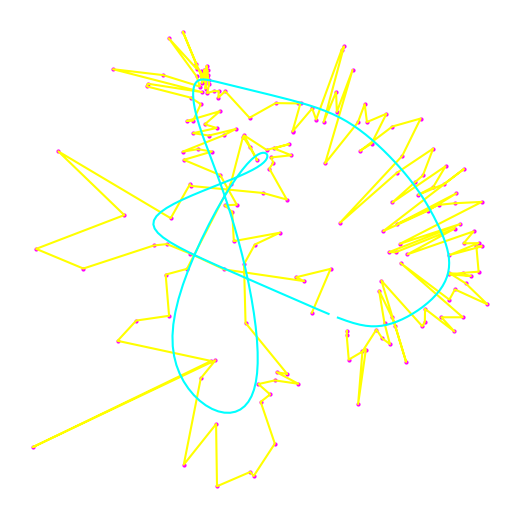

epoch :  2801   radius =  0.42507451969102783
epoch :  2901   radius =  0.38460408735457335
current path distance:  0.009142860494411606


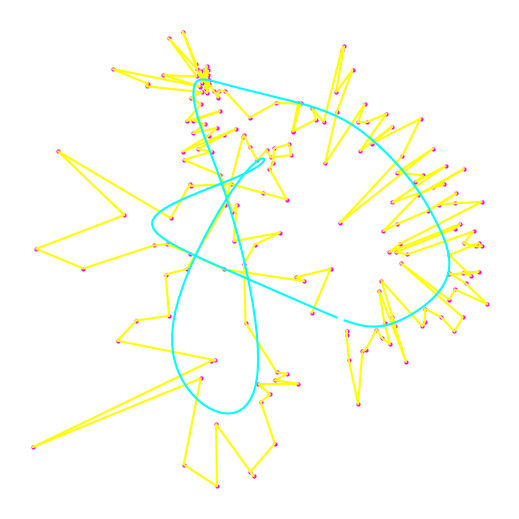

In [42]:
import numpy as np
import matplotlib.pyplot as plt

maximum = df.x.max()
minimum = df.x.min()
nesbat = np.array((maximum - minimum) / (maximum - minimum)) / max((maximum - minimum) / (maximum - minimum), 1)

df = df.apply(lambda c: (c - c.min()) / (c.max() - c.min()))

df = df.apply(lambda p: ratio * p, axis=1)

data = np.stack([np.array(df.x.values.tolist()), np.array(df.y.values.tolist())], axis=1)

Kohonen_Model = Kohonen(len(cities), feature_size=2, r=7, learning_rate=0.1)

pic1 = Kohonen_Model.plotting(data, fast=False)

for i in range(15):
    Kohonen_Model.train(cities_dataset, 200, decay=True)
    pic1 = Kohonen_Model.plotting(data, fast=False)